In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("Credit Card Transactions.csv")

In [19]:
data.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [20]:
data.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

In [5]:
data[data == 0].count()

Customer_ID                       0
Status_Checking_Acc               0
Duration_in_Months                0
Credit_History                    0
Purposre_Credit_Taken             0
Credit_Amount                     0
Savings_Acc                       0
Years_At_Present_Employment       0
Inst_Rt_Income                    0
Marital_Status_Gender             0
Other_Debtors_Guarantors          0
Current_Address_Yrs               0
Property                          0
Age                               0
Other_Inst_Plans                  0
Housing                           0
Num_CC                            0
Job                               0
Dependents                        0
Telephone                         0
Foreign_Worker                    0
Default_On_Payment             3505
Count                             0
dtype: int64

In [6]:
X = data.drop("Default_On_Payment",axis = 1)

In [7]:
Y = data["Default_On_Payment"]

# Treating outliers

In [26]:
li = list(X['Credit_Amount'].sort_values()[-5:].index)

In [27]:
X['Credit_Amount'][li] = int(X.drop(li)['Credit_Amount'].mean())

C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


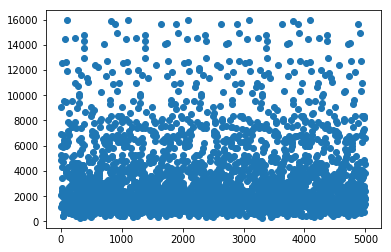

In [28]:
plt.scatter(X.index, X['Credit_Amount'])

# Under-sampling

In [72]:
Y.value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [63]:
count0 , count1 = Y.value_counts()

class0 = Y[Y==0]
class1 = Y[Y==1]

In [69]:
count0_under = class0.sample(count1)
test_under = pd.concat([count0_under,class1],axis = 0)

In [74]:
y = test_under

In [77]:
Y.shape

(5000,)

In [78]:
y.shape

(2990,)

In [129]:
x = X.iloc[:2990,:]

# Balancing output variable value count

In [22]:
li = list(data[data.Default_On_Payment == 0].sample(n=2000).index)

In [23]:
data = data.drop(data.index[li])

data['Default_On_Payment'].value_counts()

0    1505
1    1495
Name: Default_On_Payment, dtype: int64

In [24]:
X = data.drop("Default_On_Payment",axis = 1)

In [25]:
Y = data["Default_On_Payment"]

# Label encoding and standardization of data

In [21]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0],str):
        data[i] = encoder.fit_transform(data[i])

# Feature selection

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)

Customer_ID                       1.001316
Status_Checking_Acc               1.153185
Duration_in_Months                1.818984
Credit_History                    1.280699
Purposre_Credit_Taken             1.081606
Credit_Amount                     2.147174
Savings_Acc                       1.096837
Years_At_Present_Employment       1.208368
Inst_Rt_Income                    1.257582
Marital_Status_Gender             1.066261
Other_Debtors_Guarantors          1.076023
Current_Address_Yrs               1.193188
Property                          1.414800
Age                               1.308874
Other_Inst_Plans                  1.037735
Housing                           1.330468
Num_CC                            1.242676
Job                               1.330757
Dependents                        1.094009
Telephone                         1.304669
Foreign_Worker                    1.060421
Count                          5061.561673
dtype: float64

In [30]:
correlation = pd.Series([np.corrcoef(X[i],Y)[0,1] for i in list(X.columns)],index=list(X.columns))
correlation

C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Customer_ID                    0.021441
Status_Checking_Acc           -0.405708
Duration_in_Months             0.221218
Credit_History                -0.239763
Purposre_Credit_Taken         -0.001340
Credit_Amount                  0.148658
Savings_Acc                   -0.196797
Years_At_Present_Employment   -0.133638
Inst_Rt_Income                 0.085684
Marital_Status_Gender         -0.105547
Other_Debtors_Guarantors      -0.025092
Current_Address_Yrs            0.000765
Property                       0.157883
Age                           -0.099441
Other_Inst_Plans              -0.132800
Housing                       -0.017226
Num_CC                        -0.045473
Job                            0.027773
Dependents                    -0.002262
Telephone                     -0.058983
Foreign_Worker                -0.095685
Count                               NaN
dtype: float64

In [31]:
droplist = ["Customer_ID","Other_Debtors_Guarantors","Current_Address_Yrs","Housing","Num_CC","Dependents","Telephone","Count"]

In [33]:
p = X.drop(droplist,axis = 1)

# Modeling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(p,Y,test_size=.5, random_state = 1245)

In [36]:
log = LogisticRegression()
log.fit(x_train,y_train)

C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
pred = log.predict(x_test)
pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,pred)

0.7426666666666667

In [40]:
confusion_matrix(y_test,pred)

array([[547, 220],
       [166, 567]], dtype=int64)